In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [8]:
df = pd.read_csv('mushroom_dataset/mushrooms.csv')
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [3]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [25]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [52]:
X_data = df.iloc[:,1:]
y_data = df.iloc[:,0]

le = LabelEncoder()
for column in X_data.columns:
    X_data[column] = le.fit_transform(X_data[column])
    
X_data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


#### random_state를 적용하는 이유는 지정하지 않으면 매 시행마다 결과가 다르게 나오기때문에 debugging 측면에서 random_state를 설정해주는 것이 바람직하다

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,
                                                   test_size=0.2,
                                                   random_state=156)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                 test_size=0.2,
                                                 random_state=156)

models = list()
model_knn = KNeighborsClassifier()
model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier()
model_svm = SVC()
models.append(model_knn)
models.append(model_dt)
models.append(model_rf)
models.append(model_svm)

for model in models:
    model.fit(X_train, y_train)
    val_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, val_pred)
    print(f'{str(model)[:-2]} 모델 정확도 : {accuracy : .4f}')
    print(classification_report(y_val, val_pred))
    
    test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    print(f'{str(model)[:-2]} 모델 정확도 : {test_accuracy : .4f}')
    print(classification_report(y_test, test_pred))
    
    

KNeighborsClassifier 모델 정확도 :  0.9985
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       668
           1       1.00      1.00      1.00       632

    accuracy                           1.00      1300
   macro avg       1.00      1.00      1.00      1300
weighted avg       1.00      1.00      1.00      1300

KNeighborsClassifier 모델 정확도 :  0.9988
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       829
           1       1.00      1.00      1.00       796

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

DecisionTreeClassifier 모델 정확도 :  1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       668
           1       1.00      1.00      1.00       632

    accuracy                           1.00      1300
   macro avg

In [59]:
for model in models:
    kfold = KFold(n_splits=5, shuffle=True, random_state=156)
    score = cross_val_score(model, X_train, y_train, cv=kfold)
    print(f'{str(model)[:-2]} 모델 교차 검증 평균 : {np.mean(score) : .4f} ')

KNeighborsClassifier 모델 교차 검증 평균 :  0.9981 
DecisionTreeClassifier 모델 교차 검증 평균 :  1.0000 
RandomForestClassifier 모델 교차 검증 평균 :  1.0000 
SVC 모델 교차 검증 평균 :  0.9871 


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


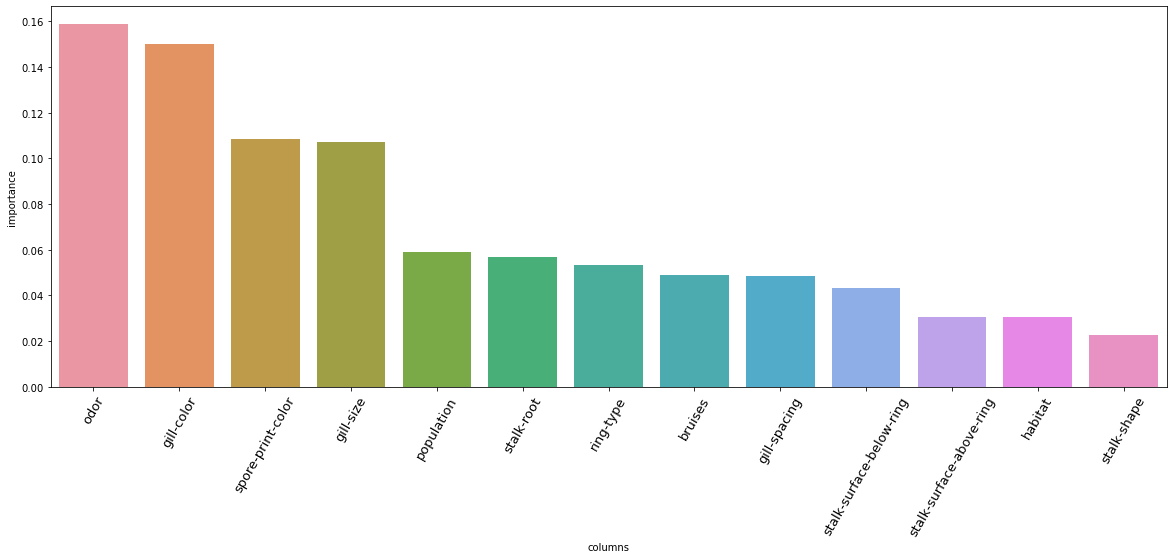

In [61]:
features_list = X_data.columns
feature_importance = model_rf.feature_importances_
df_fi = pd.DataFrame({'columns' : features_list, 'importance' : feature_importance})
df_fi = df_fi[df_fi['importance']>0.02]
df_fi = df_fi.sort_values(by=['importance'], ascending=False)

fig=plt.figure(figsize=(20,7))
ax = sns.barplot(df_fi['columns'], df_fi['importance'])
ax.set_xticklabels(df_fi['columns'], rotation=60, fontsize=13)
plt.show()